In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data_analyzer import *
from support import *
from prediction_error_evaluator import *

from change_reg_support import *
from historic_model import *

from trace_file_processor import *

In [2]:

### CONSTANTS ###

_LINEAR = 'LINEAR'
_LIN_HISTORIC = 'LIN_HISTORIC'
_SIMPLE_RNN = 'SIMPLE_RNN'
_LSTM = 'LSTM'
_GRU = 'GRU'
_CONV1D = 'CONV1D'
_ARIMA = 'ARIMA'
_POLY = 'POLY'
_EWMA = 'EWMA'
_TRANS = 'TRANSFORMER'
_CURRENT = 'CURRENT'
_SPROUT_STOCH = 'STOCH'

protocols = ['bbr', 'copa', 'cubic', 'ledbat', 'pcc', 'sprout', 'sprout-ewma', 'sprout-rw','sprout-oracle', 'vegas', 'verus', 'vivace', 'indigo', 'sprout-linear', 'sprout-LSTM', 'sprout-RW', 'sprout-GRU', 'sprout-current', 'sprout-lin-historic']

colors = {
        
    'bbr' : 'gold',
    'copa' : 'red',
    'cubic' : 'black',
    'ledbat' : 'green',
    'pcc' : 'cadetblue',
    'sprout' : 'orange',
    'sprout-ewma' : 'magenta',
    'sprout-rw' : 'silver',
    'sprout-oracle' : 'violet',
    'vegas' : 'cyan',
    'verus' : 'skyblue',
    'vivace' : 'blue',
    'indigo' : 'indigo',
    'sprout-linear' : 'lime',
    'sprout-LSTM' : 'yellowgreen',
    'sprout-RW' : 'steelblue',
    'sprout-GRU' : 'darkviolet',
    'sprout-current' : 'mediumvioletred',
    'sprout-lin-historic' : 'navy'
        
}
    
markers = {
        
    'bbr' : '^',
    'copa' : 'o',
    'cubic' : '*',
    'ledbat' : '<',
    'pcc' : '>',
    'sprout' : 'p',
    'sprout-ewma' : 'o',
    'sprout-rw' : 'h',
    'sprout-oracle' : 'D',
    'vegas' : 'h',
    'verus' : 'H',
    'vivace' : '<',
    'indigo' : 'D',
    'sprout-linear' : '+',
    'sprout-LSTM' : '+',
    'sprout-RW' : 'p',
    'sprout-GRU' : '+',
    'sprout-current' : '+',
    'sprout-lin-historic' : '+'
        
}

labels = {
        
    'bbr' : 'TCP BBR',
    'copa' : 'Copa',
    'cubic' : 'TCP Cubic',
    'ledbat' : 'LEDBAT',
    'pcc' : 'PCC',
    'sprout' : 'Sprout (95th)',
    'sprout-ewma' : 'Sprout-EWMA',
    'sprout-rw' : 'Sprout-RW',
    'sprout-oracle' : 'Sprout-Oracle',
    'vegas' : 'TCP Vegas',
    'verus' : 'Verus',
    'vivace' : 'Vivace',
    'indigo' : 'Indigo',
    'sprout-linear' : 'Sprout-Linear',
    'sprout-LSTM' : 'Sprout-LSTM',
    'sprout-RW' : 'Sprout-RW',
    'sprout-GRU' : 'Sprout-GRU',
    'sprout-current' : 'Sprout-Current',
    'sprout-lin-historic' : 'Sprout-Lin-Historic'
        
}

#Will have one of these for each trace - customizable
#Each entry has a list in the form [throughput, delay]

data_TMobile_LTE = {
        
    'bbr' : [[15.16], [73]],
    'copa' : [[7.77], [271.00]],
    'cubic' : [[18.17], [2205.04]],
    'ledbat' : [[15.78], [157.13]],
    'pcc' : [[4.22], [6679.06]],
    'sprout' : [[14.72], [75.23]],
    'sprout-ewma' : [[17.36], [184.13]],
    #'sprout-rw' : [[17.90], [169.7]],
    'sprout-oracle' : [[18.37], [61.17]],
    'vegas' : [[4.60], [16.87]],
    'verus' : [[5.46], [618.80]],
    'vivace' : [[18.54], [84889.72]],
    'indigo' : [[1.83], [10.32]],
    'sprout-linear' : [[17.23],[189.95]],
    'sprout-LSTM' : [[16.32],[159.04]],
    'sprout-GRU' : [[16.43],[158.06]],
    'sprout-current' : [[17.26],[189.21]],
    'sprout-lin-historic' : [[14.64],[112.07]]
        
}


data_TMobile_UMTS = {
        
    'bbr' : [[0.89], [511.32]],
    'copa' : [[0.90], [1623.10]],
    'cubic' : [[0.93], [42604.12]],
    'ledbat' : [[0.85], [177.73]],
    'pcc' : [[0.93], [432930.12]],
    'sprout' : [[0.81], [76.42]],
    'sprout-ewma' : [[0.87], [220.05]],
    'sprout-oracle' : [[0.93], [87]],
    'vegas' : [[0.86], [124.56]],
    'verus' : [[0.88], [735.01]],
    'vivace' : [[0.93], [350507.96]],
    'indigo' : [[0.78], [58.29]],
    'sprout-linear' : [[0.87], [235.35]],
    'sprout-LSTM' : [[0.86],[219.17]],
    'sprout-GRU' : [[0.85],[460.78]],
    'sprout-current' : [[0.87],[234.97]],
    'sprout-lin-historic' : [[0.87],[240.68]]
        
}

data_ATT_LTE = {
        
    'bbr' : [[0.90], [581.23]],
    'copa' : [[0.90], [2225.29]],
    'cubic' : [[0.92], [38032.65]],
    'ledbat' : [[0.82], [182.51]],
    'pcc' : [[0.92], [412585.98]],
    'sprout' : [[0.81], [112.72]],
    'sprout-ewma' : [[0.89], [229.07]],
    'sprout-oracle' : [[0.92], [128.43]],
    'vegas' : [[0.86], [98.17]],
    'verus' : [[0.71], [346.47]],
    'vivace' : [[0.92], [227189.92]],
    'indigo' : [[0.73], [75.58]],
    'sprout-linear' : [[0.89], [299.73]],
    'sprout-LSTM' : [[0.86],[287.81]],
    'sprout-GRU' : [[0.86],[610.04]],
    'sprout-current' : [[0.89],[307.66]],
    'sprout-lin-historic' : [[0.86],[240.65]]
        
}

data_Verizon_LTE = {
        
    'bbr' : [[6], [101.09]],
    'copa' : [[6.03], [612.21]],
    'cubic' : [[6.15], [9289.14]],
    'ledbat' : [[6.08], [176.91]],
    'pcc' : [[3.8], [37753.01]],
    'sprout' : [[6.08], [100.93]],
    'sprout-ewma' : [[6.11], [220.25]],
    'sprout-oracle' : [[6.05], [74.41]],
    'vegas' : [[4.17], [24.95]],
    'verus' : [[3.49], [90.98]],
    'vivace' : [[5.47], [115725.63]],
    'indigo' : [[2.35], [19.39]],
    'sprout-linear' : [[6.10], [226.41]],
    'sprout-LSTM' : [[5.97],[194.25]],
    'sprout-GRU' : [[5.95],[199.50]],
    'sprout-current' : [[6.10],[225.93]],
    'sprout-lin-historic' : [[5.80],[135.78]]
        
}

data_Verizon_EVDO = {
        
    'bbr' : [[0.74], [707.73]],
    'copa' : [[0.74], [1523.05]],
    'cubic' : [[0.84], [58355.49]],
    'ledbat' : [[0.6], [247.38]],
    'pcc' : [[0.84], [463881.65]],
    'sprout' : [[0.51], [187.05]],
    'sprout-ewma' : [[0.67], [289.18]],
    'sprout-oracle' : [[0.84], [142.72]],
    'vegas' : [[0.55], [132.54]],
    'verus' : [[0.52], [675.93]],
    'vivace' : [[0.84], [306244.34]],
    'indigo' : [[0.37], [81.96]],
    'sprout-linear' : [[0.69], [355.11]],
    'sprout-LSTM' : [[0.63],[344.38]],
    'sprout-GRU' : [[0.63],[1473.12]],
    'sprout-current' : [[0.7],[357.92]],
    'sprout-lin-historic' : [[0.60],[323.95]]
}




In [39]:

def plot_panth_results(data, trace, save=False):

    # Creating figure
    fig, axs = plt.subplots(1,1, figsize=(8,6))
    
    for protocol in protocols:
        
        if protocol in data:
            
            if protocol == 'sprout-LSTM' or protocol == 'sprout-GRU' or protocol == 'sprout-lin-historic' or protocol == 'sprout-current' or protocol == 'sprout-linear':
                
                alpha = 1
                s=75
                if protocol == 'sprout-current':
                    
                    s=75
                
                axs.scatter(data[protocol][1], data[protocol][0], marker=markers[protocol], s=s, color=colors[protocol], label=labels[protocol], alpha=alpha)
            else:
                
                axs.scatter(data[protocol][1], data[protocol][0], marker=markers[protocol], color=colors[protocol], label=labels[protocol])

    # Setting the scale of the x-axis to logarithmic
    axs.set_xscale('log', base=2)
    #axs.set_xlim(1,100500)
    axs.invert_xaxis()

    # Setting the title and grid
    axs.set_title("Pantheon Experiment on {}".format(trace), pad=20, fontsize=16)
    axs.set_xlabel("95th percentile one-way delay (ms)", fontsize=14)
    axs.set_ylabel("Average throughput (Mbit/s)", fontsize=14)

    pos = axs.get_position()
    axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

    axs.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))

    axs.grid()

    if save:
        
        fig.savefig('Pantheon-Comparison-{}.pdf'.format(trace), bbox_inches='tight', dpi=1000)

    plt.show()



In [70]:

#data here will be a list of tuples with (trace, data dict for trace)
def plot_panth_all(data_traces, save=False):

    # Creating figure
    fig, axs = plt.subplots(2,2, figsize=(14, 10))
    
    indices = [(0,0), (0,1), (1,0), (1,1)]
    
    
    
    for i, elem in enumerate(data_traces):
        
        trace, data = elem
        
        row, col = indices[i]
                
        for protocol in protocols:
        
            if protocol in data:
                
                if protocol == 'sprout-LSTM' or protocol == 'sprout-GRU' or protocol == 'sprout-lin-historic' or protocol == 'sprout-current' or protocol == 'sprout-linear':
                
                    alpha = 1
                    s=75
                    
                    if protocol == 'sprout-current':
                    
                        s=75
                
                    axs[row][col].scatter(data[protocol][1], data[protocol][0], marker=markers[protocol], s=s, color=colors[protocol], label=labels[protocol], alpha=alpha)
                else:
                
                    axs[row][col].scatter(data[protocol][1], data[protocol][0], marker=markers[protocol], color=colors[protocol], label=labels[protocol])

            # Setting the scale of the x-axis to logarithmic
    
        axs[row][col].set_xscale('log', base=2)
    
        axs[row][col].invert_xaxis()

        # Setting the title and grid
        pad=20
        if row==1:
            pad=10
            
        axs[row][col].set_title("{}".format(trace), pad=pad, fontsize=16)
        
        if row==1:
            axs[row][col].set_xlabel("95th percentile one-way delay (ms)", fontsize=14)
        
        if col==0:
            axs[row][col].set_ylabel("Average throughput (Mbit/s)", fontsize=14)
        
        axs[row][col].grid()

        pos = axs[row][col].get_position()
        axs[row][col].set_position([pos.x0, pos.y0, pos.width * 1, pos.height])

    # So far, nothing special except the managed prop_cycle. Now the trick:
    lines_labels = [axs.get_legend_handles_labels() for axs in fig.axes]
    lines, labelss = [sum(lol, []) for lol in zip(*lines_labels)]
    
    idx = np.sort(np.unique(np.array(labelss), return_index=True)[1])

    # Finally, the legend (that maybe you'll customize differently)
    fig.legend(lines, np.array(labelss)[idx], loc='center right', bbox_to_anchor=(1.055, 0.5), ncol=1)
        
    #axs[row][col].legend(loc='lower left')

    #fig.tight_layout(pad=4)
    
    fig.suptitle('Final Pantheon Experiments', fontsize=18, y=0.98)
    
    if save:
        
        fig.savefig('Pantheon-All-{}.pdf', bbox_inches='tight', dpi=500)

    
    plt.show()

In [71]:
d = [('TMobile-LTE', data_TMobile_LTE), ('TMobile-UMTS', data_TMobile_UMTS), ('ATT-LTE', data_ATT_LTE), ('Verizon-EVDO', data_Verizon_EVDO)]

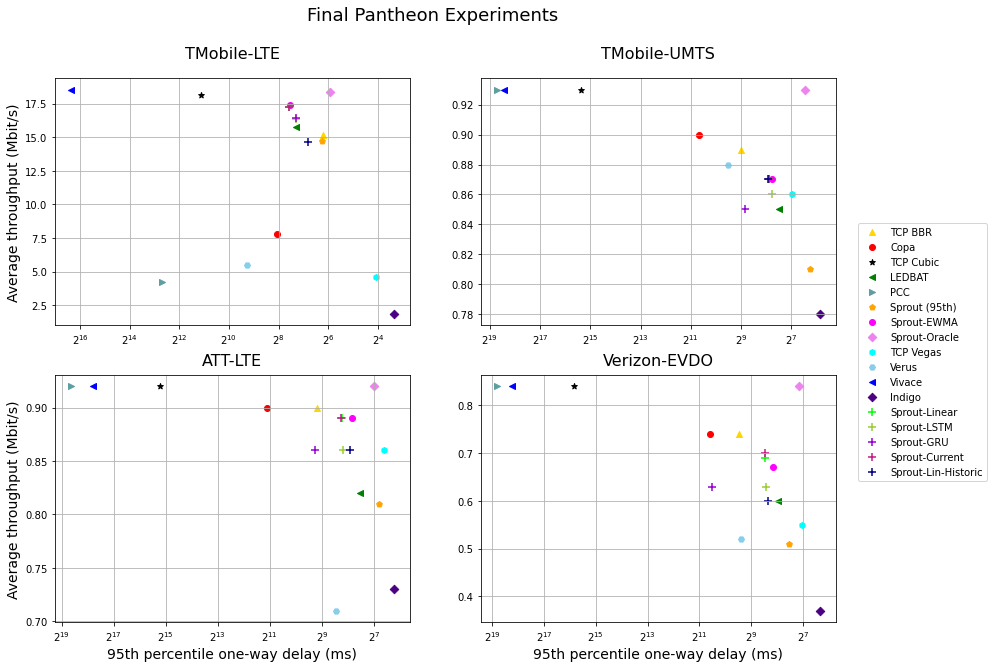

In [73]:
plot_panth_all(d, save=True)

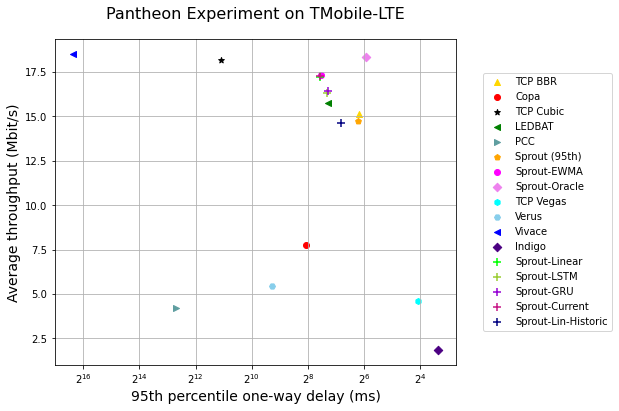

In [44]:
plot_panth_results(data_TMobile_LTE, 'TMobile-LTE', save=True)

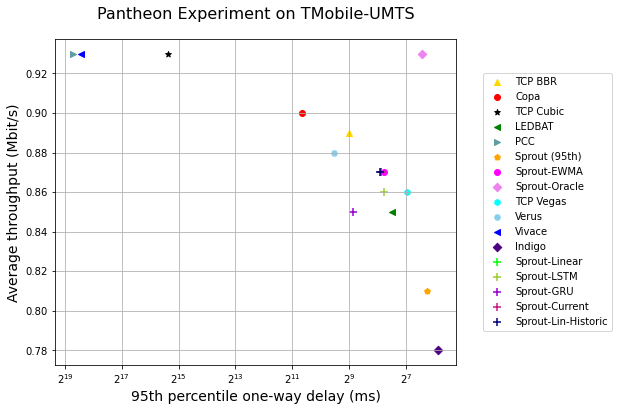

In [45]:
plot_panth_results(data_TMobile_UMTS, 'TMobile-UMTS', save=True)

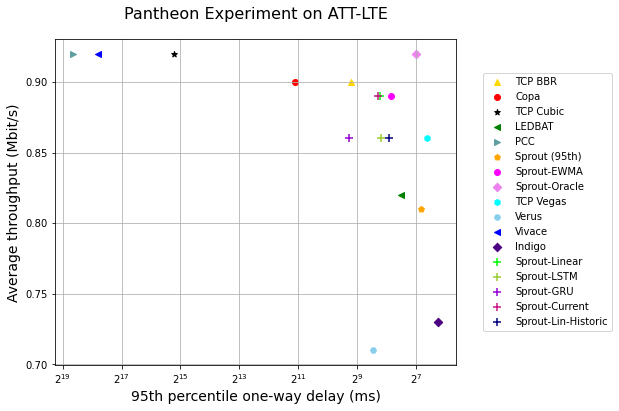

In [46]:
plot_panth_results(data_ATT_LTE, 'ATT-LTE', save=True)

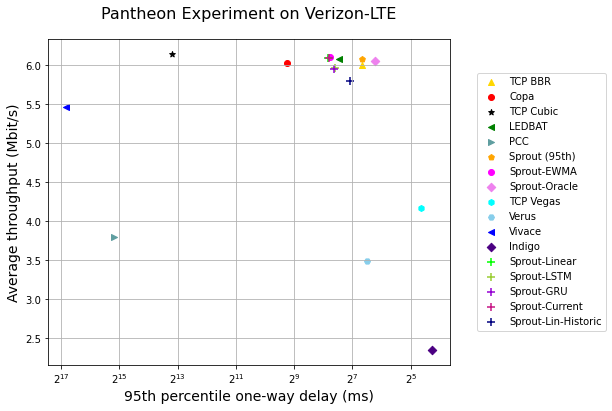

In [47]:
plot_panth_results(data_Verizon_LTE, 'Verizon-LTE', save=True)

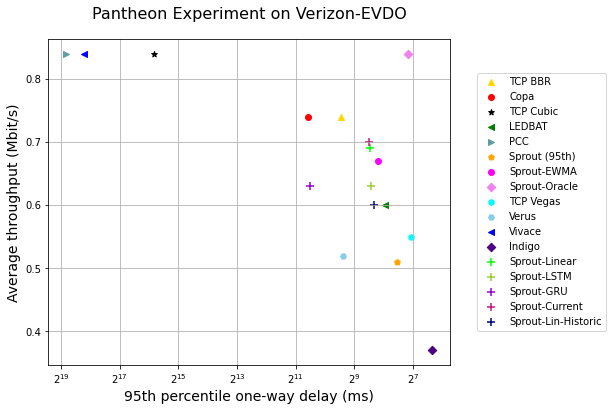

In [48]:
plot_panth_results(data_Verizon_EVDO, 'Verizon-EVDO', save=True)

In [12]:
# This is to plot RMSE vs Model for all traces we want for a particular step size

path_to_files = 'Future-Window/'
path_to_files_cur = 'Future-Constant-Window/'

In [13]:
#Loading and processing relevant data
data = get_all_trial_datasets()
processed_train_data = get_all_trial_processed_datasets(data)

### CONSTANTS ###

DIM = 5
DROP_FROM = 6

#Using this will mean that the new_processed data will have labels and data points overlap at time t. We need
#this since we will do our own pre-processing before fitting the LSTM
STEP = 'STEP_0'

new_processed = process_labels_and_dataset(processed_train_data, int(STEP[-1:]))

In [14]:

#NOTE: WE SHOULD BE USING NORMALIZED RMSE since traces have different scales
#      Normalize across the models for each trace not the other way around

#Normalized RMSE:


#       Norm RMSE = RMSE / (max_rmse - min_rmse)
#
#Produces value between 0 and 1. The close to 0 the better.


def plot_rmse_vs_model(plot_traces, future, normalize=True):
    
    names = ['CUR', 'EWMA', 'LIN', 'LIN_HIST', 'LSTM', 'GRU', 'S_RNN', 'TRANS']

    fig, axs = plt.subplots(1, 1, figsize=(7, 4))

    index = future - 1 # -1 since at index 0 we have future 1 
    
    for tr in plot_traces:
    
        with open(path_to_files + tr + '-window.txt') as file:
        
            lines = file.readlines()
        
        models = []
        fut_values = []
        
        for b in lines:
            
            b = b.split(' ')
            b = np.array(b)
            b[0] = b[0][:-1] #remove : from model name
            b[len(b)-1] = b[len(b)-1][:-1] #remove new line character from last element
    
            name = b[0]
            rmses = [float(i) for i in b[1:]]
        
            rmse_fut = rmses[index]
        
            models.append(name)
            fut_values.append(rmse_fut)
        
        #print(len(names))
        #print(len(fut_values))
        
        #Normalize across models
        
        if (normalize):
        
            #We trained the models using the 'change' so these will hold our max and min values
            y = new_processed[tr][LABELS][DROP_FROM:]
            
        else:
            
            y = [1,0]
        
        rmse_max = max(y)
        rmse_min = min(y)
            
        norm = [x/(rmse_max - rmse_min) for x in fut_values]
        
        axs.scatter(names, norm, marker='x', label=tr)
        
    axs.set_title('RMSE vs Model', fontsize=14, pad=20)
    axs.set_xlabel('Model', fontsize=12)
    axs.set_ylabel('RMSE', fontsize=12)
    pos = axs.get_position()
    axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    axs.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
    axs.grid()

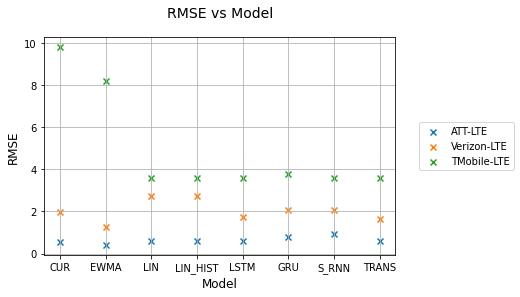

In [15]:
plot_traces = ['ATT-LTE', 'Verizon-LTE', 'TMobile-LTE'] #all of them for now - but customizable


plot_rmse_vs_model(plot_traces, 1, False)

In [16]:

model_colors = {
        
    'CURRENT' : 'mediumspringgreen',
    'EWMA' : 'green',
    'LINEAR' : 'blue',
    'LIN_HISTORIC' : 'steelblue',
    'LSTM' : 'red',
    'GRU' : 'aqua',
    'SIMPLE_RNN' : 'orange',
    'TRANSFORMER' : 'violet'
        
}

trace_colors = {
        
    'TMobile-UMTS' : 'green',
    'TMobile-LTE' : 'aqua',
    'ATT-LTE' : 'blue',
    'Verizon-LTE' : 'steelblue',
    'Verizon-EVDO' : 'red'
        
}

model_linestyle = {
        
    'CURRENT' : 'solid',
    'EWMA' : 'dashed',
    'LINEAR' : 'dashdot',
    'LIN_HISTORIC' : '--',
    'LSTM' : 'dashdot',
    'GRU' : ' ',
    'SIMPLE_RNN' : 'dashdot',
    'TRANSFORMER' : 'dotted'
        
}


In [17]:
def plot_rmse_vs_window_all(bound, normalize=False, path_to_files='Future-Window/', save=False):
    
    alphas = [(_CURRENT, (0,0), 0.9), (_EWMA, (0,1), 1), (_LINEAR, (1,0), 0.8), (_LIN_HISTORIC, (1,1), 0.7), (_LSTM, (2,0), 0.6), (_GRU, (2,1), 0.5), (_SIMPLE_RNN, (3,0), 1), (_TRANS, (3,1), 0.8)]

    positions = [(0,0), (0,1), (1,0), (1,1)]

    
    
    fig, axs = plt.subplots(2, 2, figsize=(20, 14))
    
    tra = ['TMobile-UMTS', 'TMobile-LTE', 'ATT-LTE', 'Verizon-EVDO']
    
    for k, tr in enumerate(tra):
        
        if (normalize):
        
            #We trained the models using the 'change' so these will hold our max and min values
            y = new_processed[tr][LABELS][DROP_FROM:]
            
        else:
            
            y = [1,0]
        
        rmse_max = max(y)
        rmse_min = min(y)

        with open(path_to_files + tr + '-window.txt') as file:
        
            lines = file.readlines()
    
        row, col = positions[k]

        for q, b in enumerate(lines):
            
            b = b.split(' ')
            b = np.array(b)
            b[0] = b[0][:-1] #remove : from model name
            b[len(b)-1] = b[len(b)-1][:-1] #remove new line character from last element
    
            name = b[0]
            rmses = [float(i) for i in b[1:]]
        
            norm = [x/(rmse_max - rmse_min) for x in rmses]
            
            x_axis = np.arange(1,bound,1)
            alpha = alphas[q][2]
        
            axs[row][col].plot(x_axis, norm, marker='x', color=model_colors[name], label=name, alpha=alpha, linestyle='dotted')
    
        
        pos = axs[row][col].get_position()
        axs[row][col].set_position([pos.x0, pos.y0, pos.width * 1, pos.height])
            #axs[row][col].legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
            #axs[row][col].legend(loc='upper left')
            #axs[row][col].set_ylim(0,1)
        
        #axs[row][col].grid()
        
        axs[row][col].set_title(tr, pad=20, fontsize=22)
        
    
        if (col == 0 and (row == 0 or row == 1)):
            
            axs[row][col].set_ylabel('NRMSE', fontsize=20)
        
        if (row == 1):
        
            axs[row][col].set_xlabel('Forecast Window', fontsize=20)
        
            
    #axs.set_title('Model RMSE vs Forecast Window', pad=20, fontsize=14)
    #axs.set_xlabel('Forecast Window', fontsize=12)
    #axs.set_ylabel('RMSE', fontsize=12)

  
    # So far, nothing special except the managed prop_cycle. Now the trick:
    lines_labels = [axs.get_legend_handles_labels() for axs in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    
    idx = np.sort(np.unique(np.array(labels), return_index=True)[1])

    # Finally, the legend (that maybe you'll customize differently)
    fig.legend(lines, np.array(labels)[idx], loc='center right', bbox_to_anchor=(1.04, 0.5), ncol=1, prop={'size':15}, labelspacing=1.5)
    
    fig.suptitle('Model NRMSE vs Forecast Window', fontsize=26, y=0.97)
    #fig.tight_layout(pad=10.0)
    
    if save:
        
        fig.savefig("rmse-vs-window-all.pdf", bbox_inches='tight', dpi=500)
    #pos = axs.get_position()
    #axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    #axs.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
   
    #axs.grid()

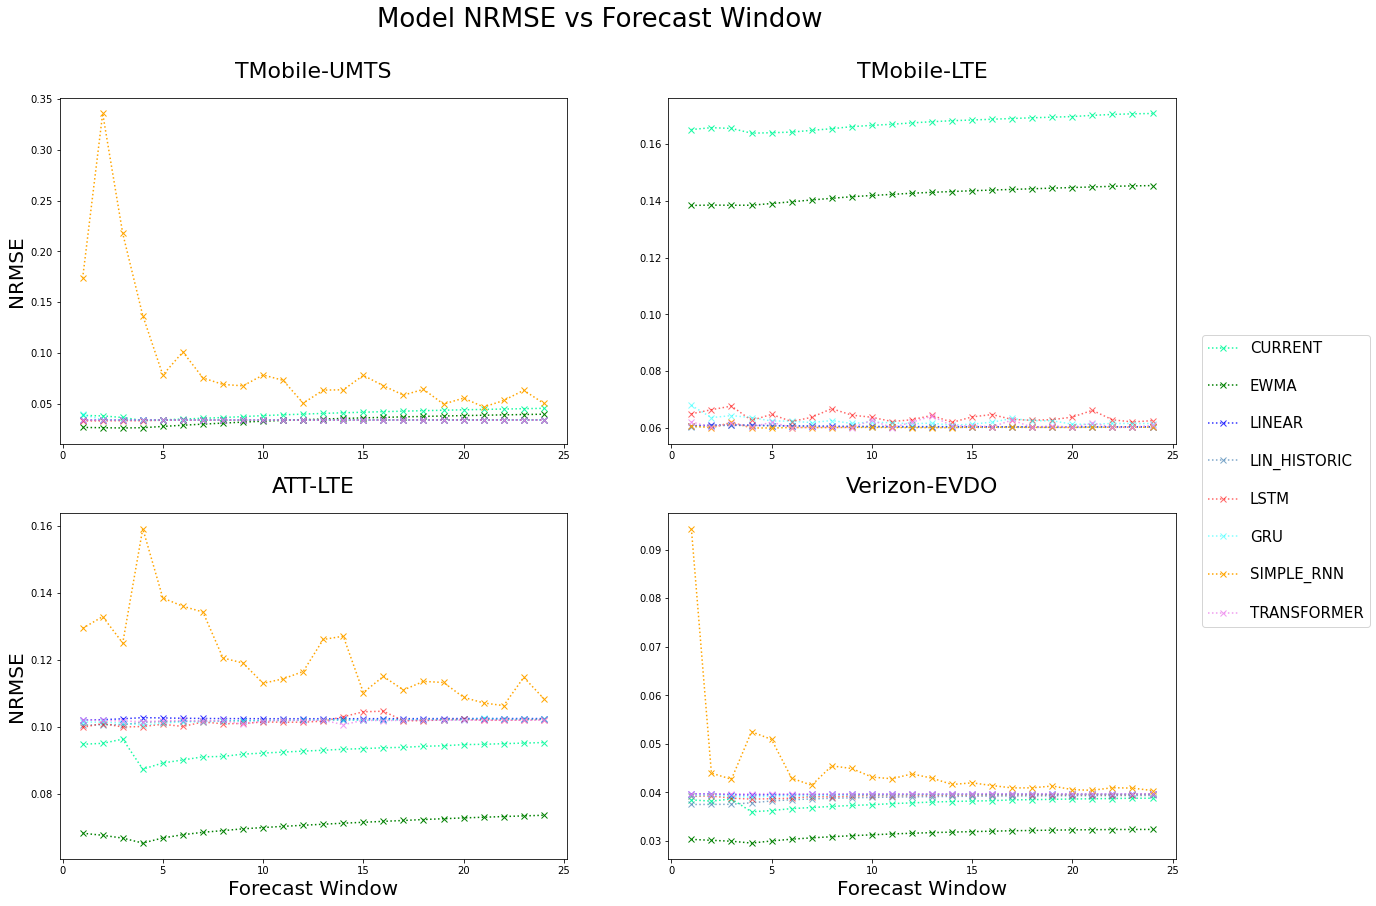

In [18]:
plot_rmse_vs_window_all(25, normalize=True, path_to_files='Future-Window/Old Data - 128 units/', save=True)

In [19]:
### This is to regenerate the rmse vs window plots when doing the training/data-collection

In [20]:


def plot_rmse_vs_window(tr, bound, normalize=False, path_to_files='Future-Window/', on_single_plot=False, save=False):
    
    indices = [(_CURRENT, (0,0), 0.9), (_EWMA, (0,1), 1), (_LINEAR, (1,0), 0.8), (_LIN_HISTORIC, (1,1), 0.7), (_LSTM, (2,0), 0.6), (_GRU, (2,1), 0.5), (_SIMPLE_RNN, (3,0), 0.4), (_TRANS, (3,1), 0.6)]

    
    if (normalize):
        
        #We trained the models using the 'change' so these will hold our max and min values
        y = new_processed[tr][LABELS][DROP_FROM:]
            
    else:
            
        y = [1,0]
        
    rmse_max = max(y)
    rmse_min = min(y)

    with open(path_to_files + tr + '-window.txt') as file:
        
        lines = file.readlines()
    
    
    if on_single_plot:
    
        fig, axs = plt.subplots(1, 1, figsize=(7, 4))
    
    else:
        
        fig, axs = plt.subplots(4, 2, figsize=(14, 20))
    
    k = 0
    for b in lines:
            
        b = b.split(' ')
        b = np.array(b)
        b[0] = b[0][:-1] #remove : from model name
        b[len(b)-1] = b[len(b)-1][:-1] #remove new line character from last element
    
        name = b[0]
        rmses = [float(i) for i in b[1:]]
        
        norm = [x/(rmse_max - rmse_min) for x in rmses]
        
        row, col = indices[k][1]
        alpha = indices[k][2]
        k = k + 1
    
        x_axis = np.arange(1,bound,1)
        
        if on_single_plot:
            
            axs.plot(x_axis, norm, marker='x', color=model_colors[name], label=name, alpha=alpha, linestyle='dotted')
        
        else:
        
            axs[row][col].scatter(x_axis, norm, marker='x', color=model_colors[name], label=name)
    
            pos = axs[row][col].get_position()
            #axs[row][col].set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
            #axs[row][col].legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
            axs[row][col].legend(loc='upper left')
            #axs[row][col].set_ylim(0,1)
            axs[row][col].grid()
        
    
            if (col == 0 and (row == 0 or row == 1 or row == 2 or row == 3)):
                axs[row][col].set_ylabel('NRMSE', fontsize=12)
        
            if (row == 3):
        
                axs[row][col].set_xlabel('Forecast Window', fontsize=12)
        
            
    #axs.set_title('Model RMSE vs Forecast Window', pad=20, fontsize=14)
    #axs.set_xlabel('Forecast Window', fontsize=12)
    #axs.set_ylabel('RMSE', fontsize=12)

    if not on_single_plot:
        
        fig.suptitle('{}: Model NRMSE vs Forecast Window'.format(tr), fontsize=16, y=0.95)
        fig.tight_layout(pad=5.0)
    
    else:
        
        pos = axs.get_position()
        axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
        axs.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
        axs.grid()
    
    if save:
        
        fig.savefig("rmse-vs-window-{}.pdf".format(tr), dpi=500)
    #pos = axs.get_position()
    #axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
    #axs.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
   
    #axs.grid()

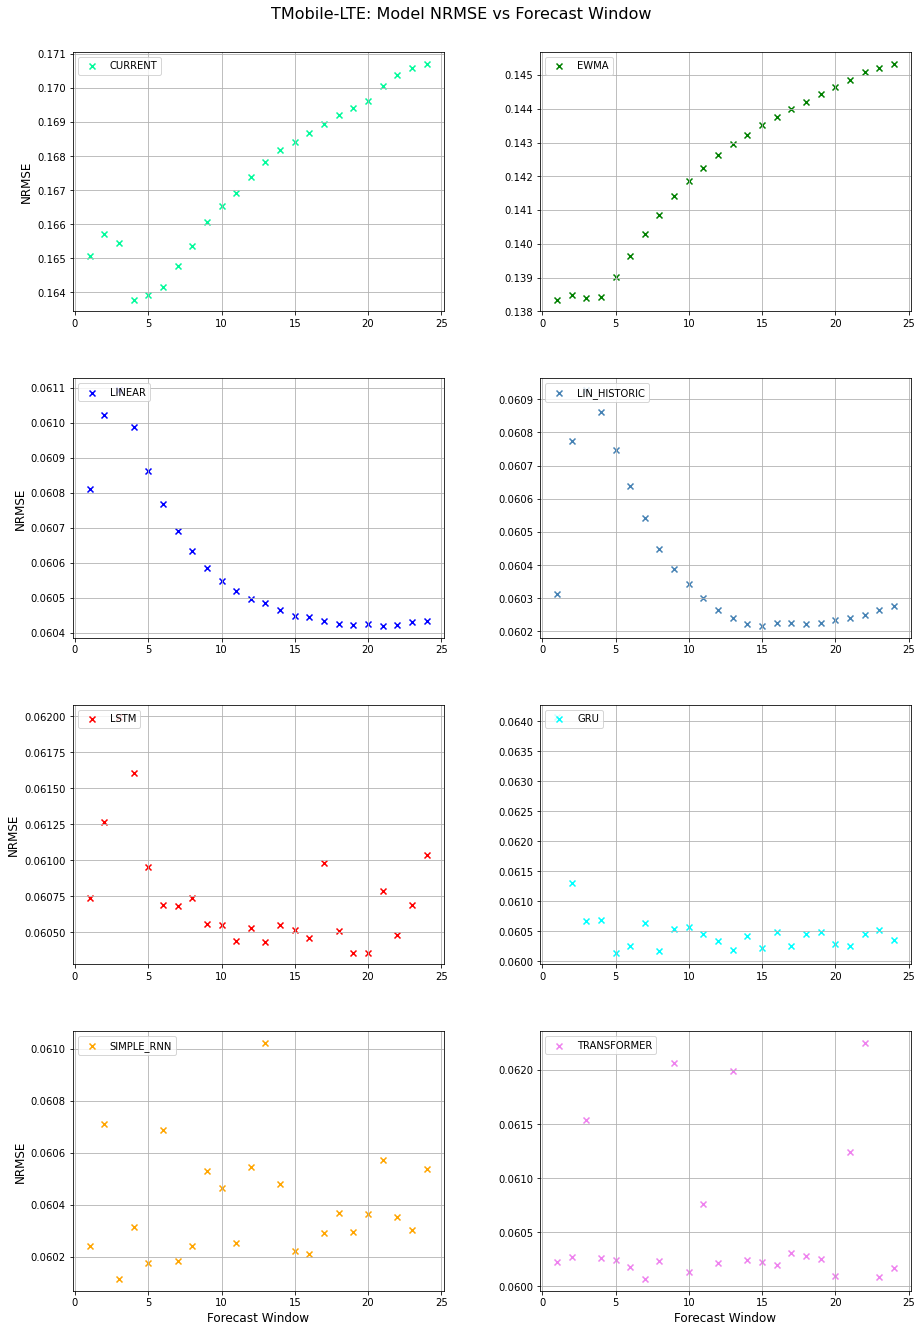

In [21]:
plot_rmse_vs_window('TMobile-LTE', 25, normalize=True, on_single_plot=False, save=True)

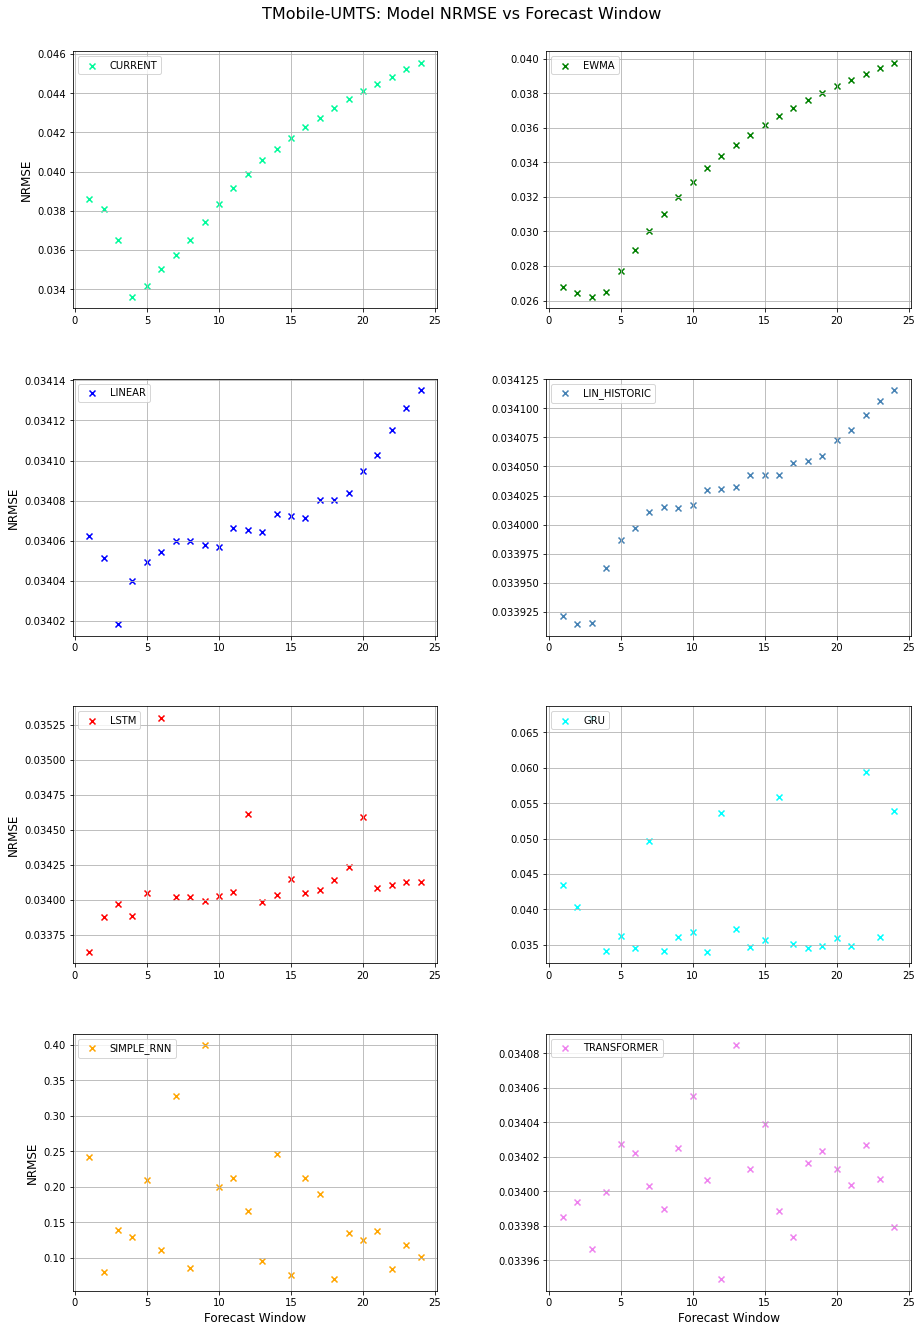

In [22]:
plot_rmse_vs_window('TMobile-UMTS', 25, normalize=True, on_single_plot=False, save=True)

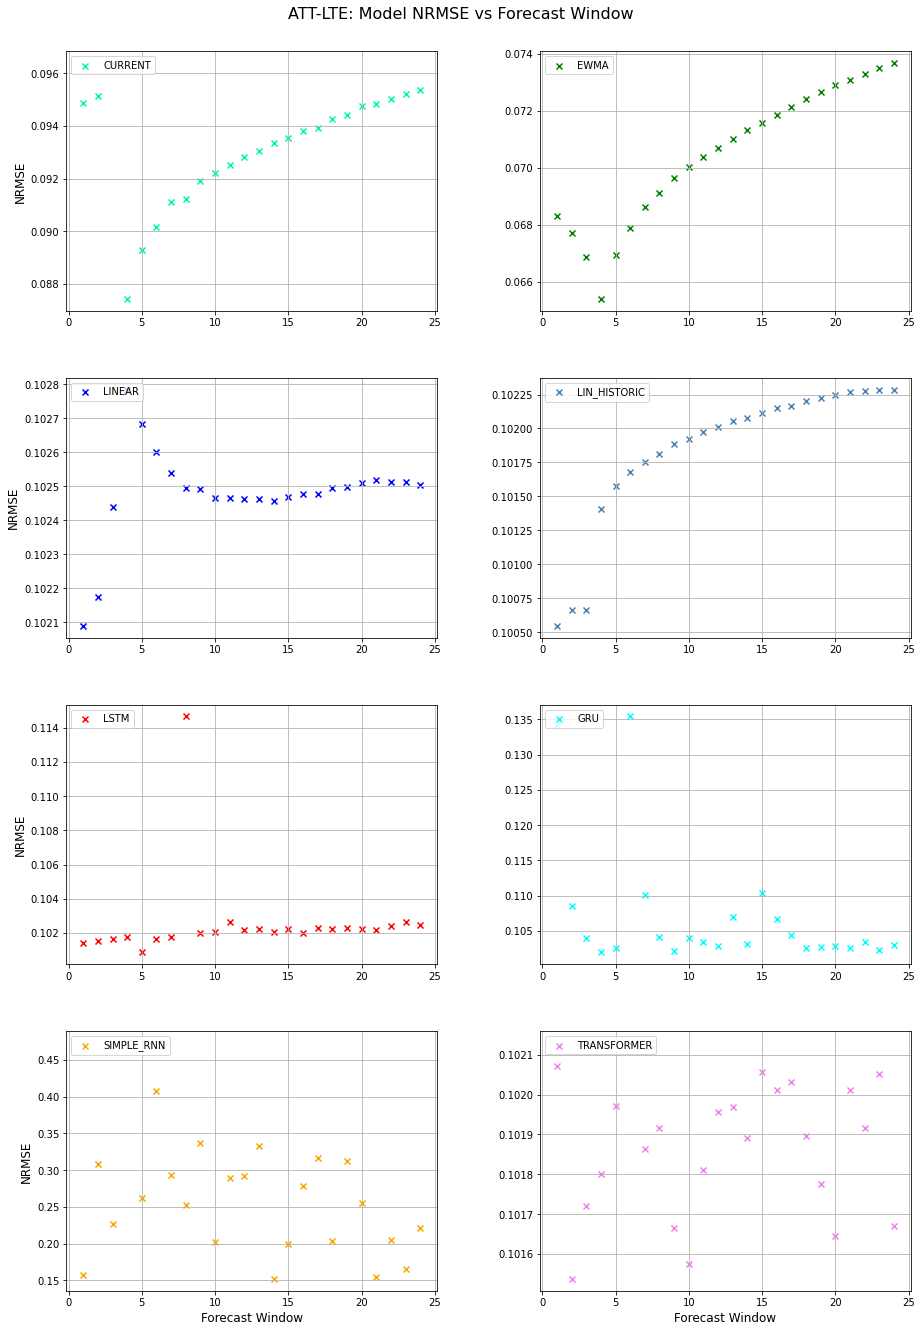

In [23]:
plot_rmse_vs_window('ATT-LTE', 25, normalize=True, on_single_plot=False, save=True)

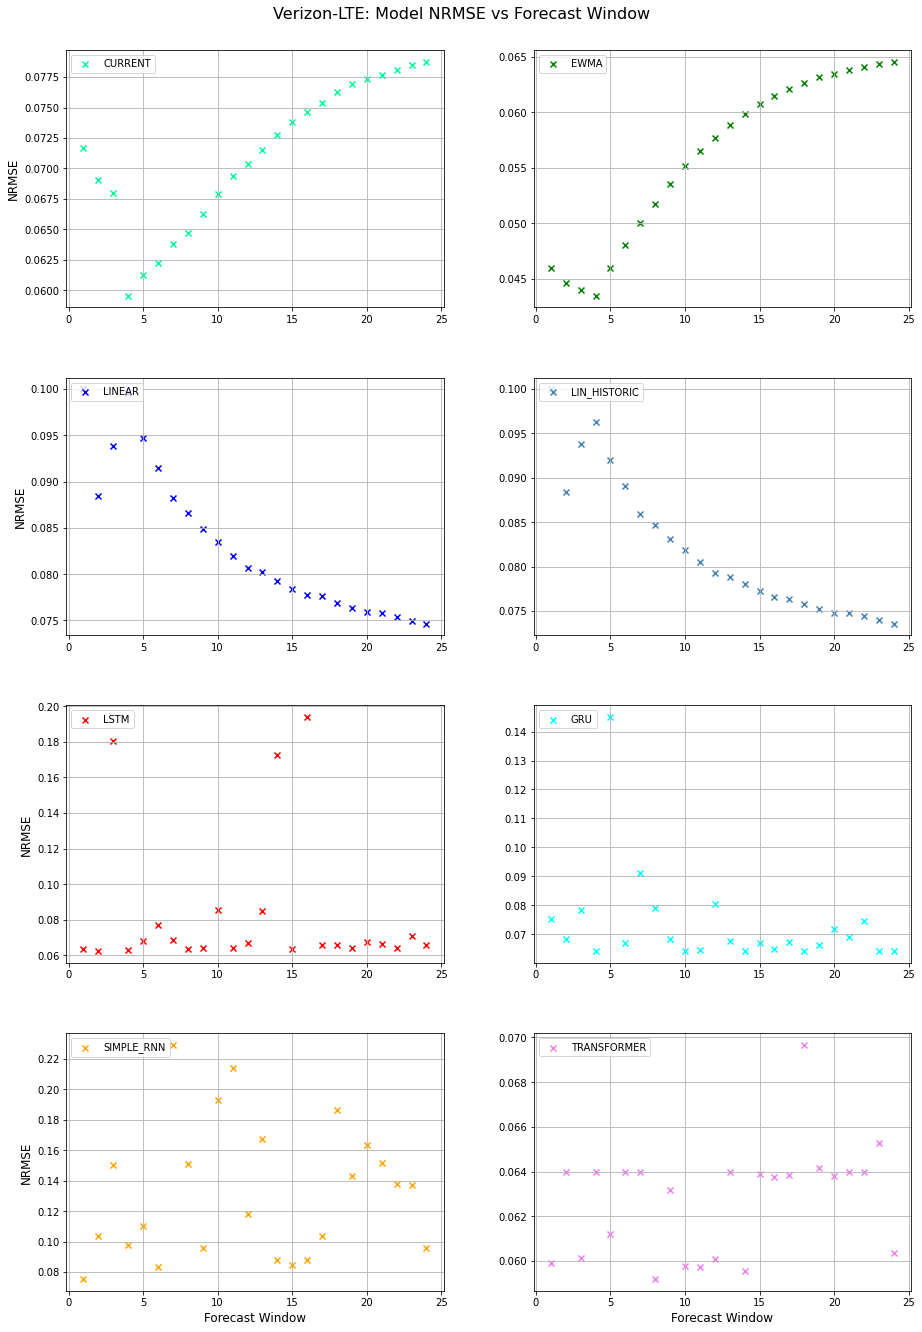

In [24]:
plot_rmse_vs_window('Verizon-LTE', 25, normalize=True, on_single_plot=False, save=True)

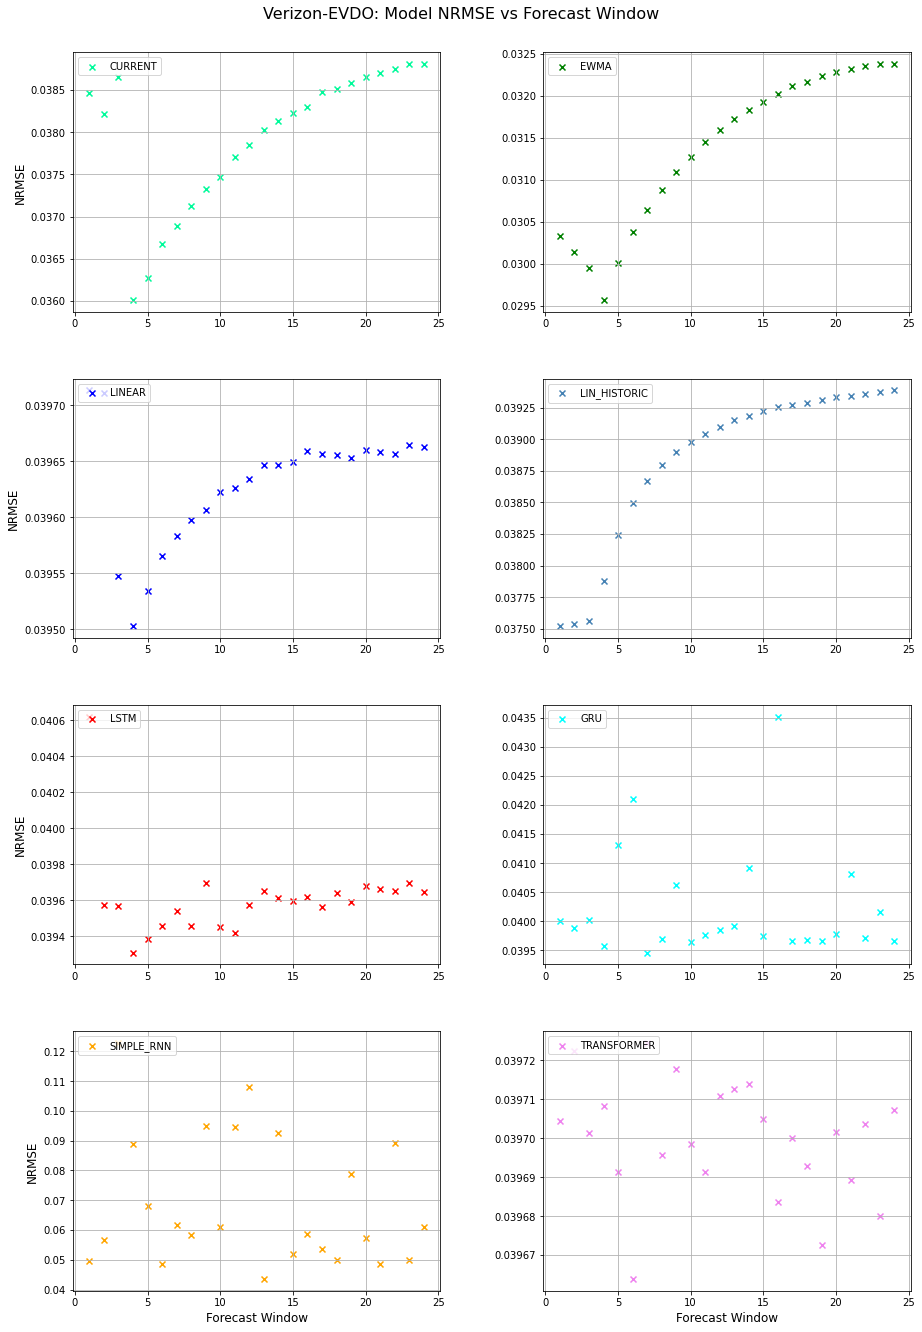

In [25]:
plot_rmse_vs_window('Verizon-EVDO', 25, normalize=True, on_single_plot=False, save=True)

In [26]:
### This will generate data for using the current change as the future prediction ###
### Important for us to understand whether forecast even matters ###

In [27]:
def plot_curr_pred_fut(trace, bound, normalize=False):

    data = []
    
    with open(path_to_files + trace + '-window.txt') as file:
        
        lines = file.readlines()

    for line in lines:

        ind = line.index(':')
        name = line[0:ind]
    
        fut_1 = line[ind+1:ind+2+8]
    
        n = fut_1 * bound
        
        new_str = name + ':' + n + '\n' #\n at end of last element
        
        data.append(new_str)
        
    with open(path_to_files_cur + trace + '-window.txt', 'w') as file:
    
        for elem in data:
        
            file.write(elem)
            
    plot_rmse_vs_window(trace, bound, normalize, path_to_files_cur)


In [224]:
#plot_rmse_vs_window('TMobile-LTE', 25, False, path_to_files_cur)

In [225]:
#plot_rmse_vs_window('ATT-LTE', 25, normalize=False, path_to_files='Future-Constant-Window/')

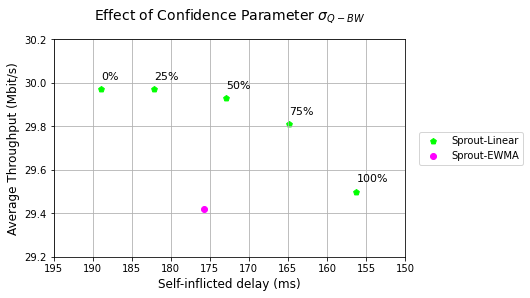

In [226]:
### For changing the confidence (tunable parameter) in our prediction after estimating Q_t dynamically ###

fig, axs = plt.subplots(1,1, figsize=(7,4))

#In the order 0, 0.25, 0.5, 0.75, 1
thr = [29.97, 29.97, 29.93, 29.81, 29.50]
dly = [188.92, 182.17, 172.94, 164.82, 156.24]

txt = ['0%', '25%', '50%', '75%', '100%']

for i, txt in enumerate(txt):
    axs.annotate(txt, (dly[i], thr[i]), textcoords="offset points",
                 xytext=(0,10),
                 ha='left', fontsize=11)


axs.scatter(dly, thr, marker='p', color='lime', label='Sprout-Linear')

axs.scatter(175.77, 29.42, marker='o', color='magenta', label='Sprout-EWMA')

#d = data_TMobile_LTE
#for protocol in protocols:
    
#    if protocol in d:
        
#        if protocol == 'sprout-ewma' or protocol == 'sprout-linear':
            
#            continue
        
#        axs.scatter(d[protocol][1], d[protocol][0], marker=markers[protocol], color=colors[protocol], label=labels[protocol])

axs.set_ylim(29.2, 30.2)
axs.set_xlim(150, 195)
#axs.set_xscale('log', base=2)
axs.invert_xaxis()
axs.grid()
pos = axs.get_position()
axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

axs.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))

axs.set_title('Effect of Confidence Parameter $\sigma_{Q-BW}$', pad=20, fontsize=14)
axs.set_xlabel('Self-inflicted delay (ms)', fontsize=12)
axs.set_ylabel('Average Throughput (Mbit/s)', fontsize=12)

fig.savefig('Conf-param.pdf', bbox_inches='tight', dpi=500)

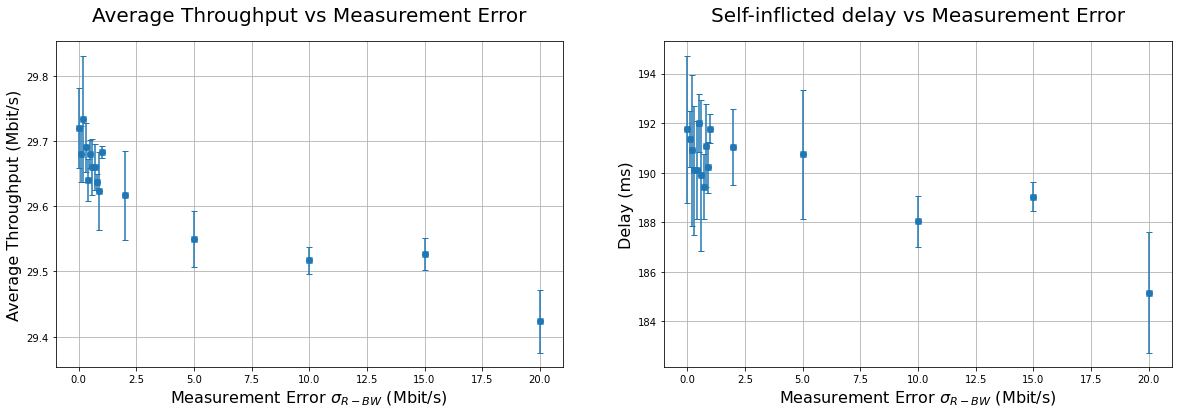

In [227]:
### For tuning R ###

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

#In the order 0, 0.25, 0.5, 0.75, 1
#thr = [29.37, 29.63, 28.85, 29.39, 29.05, 29.05, 29.03, 29.60, 29.45, 29.11, 29.00, 28.57, 28.44, 28.42, 27.48, 26.97]
#dly = [158, 156.97, 163.30, 155.71, 156.45, 156.45, 161.16, 159.56, 155.63, 155.81, 158.96, 156.74, 154.31, 159.57, 162.34, 161.80]


thr = [[29.64, 29.73, 29.79], [29.7, 29.62, 29.72], [29.66, 29.67, 29.87], [29.64, 29.7, 29.73], [29.68, 29.64, 29.60], [29.69, 29.65, 29.7], [29.72, 29.62, 29.64], [29.63, 29.64, 29.71], [29.64, 29.62, 29.65], [29.68, 29.65, 29.54], [29.69, 29.67, 29.69], [29.67, 29.52, 29.66], [29.57, 29.49, 29.59], [29.52, 29.54, 29.49], [29.5, 29.52, 29.56], [29.4, 29.38, 29.49]]
dly = [[189.4, 195.92, 189.91], [192.08, 189.76, 192.22], [192.28, 193.76, 186.66], [186.49, 192.53, 191.29], [192.55, 190.03, 187.73], [191.09, 191.22, 193.64], [188.45, 194.13, 187.08], [188.51, 188.49, 191.3], [189.34, 193.33, 190.6], [190.82, 188.75, 191.07], [191.75, 192.5, 191.07], [189.73, 193.20, 190.16], [187.04, 192.67, 192.49], [186.62, 189.01, 188.48], [188.25, 189.16, 189.66], [188.25, 182.33, 184.89]]

sigma_r = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 15, 20]

#txt = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1', '2', '5', '10', '15', '20']
 
#for i, txt in enumerate(txt):
#    axs.annotate(txt, (dly[i], thr[i]), textcoords="offset points",
#                 xytext=(0,10),
#                 ha='left', fontsize=11)


axs[0].scatter(sigma_r, np.mean(thr, axis=1), marker='x', label='Linear')
axs[0].errorbar(sigma_r, np.mean(thr, axis=1), yerr = np.std(thr, axis=1), fmt="o", capsize=3)
axs[0].set_title("Average Throughput vs Measurement Error", fontsize=20, pad=20)
axs[0].set_xlabel("Measurement Error $\sigma_{R-BW}$ (Mbit/s)", fontsize=16)
axs[0].set_ylabel("Average Throughput (Mbit/s)", fontsize=16)

axs[1].scatter(sigma_r, np.mean(dly, axis=1), marker='x', label='Linear')
axs[1].errorbar(sigma_r, np.mean(dly, axis=1), yerr = np.std(dly, axis=1), fmt="o", capsize=3)

axs[1].set_title("Self-inflicted delay vs Measurement Error", fontsize=20, pad=20)
axs[1].set_xlabel("Measurement Error $\sigma_{R-BW}$ (Mbit/s)", fontsize=16)
axs[1].set_ylabel("Delay (ms)", fontsize=16)

axs[0].grid()
axs[1].grid()

#axs.scatter(175.77, 29.42, marker='o', color='magenta', label='EWMA')

#axs.set_ylim(26, 30.2)
#axs.set_xlim(150, 195)
#axs.invert_xaxis()
#axs.grid()
#pos = axs.get_position()
#axs.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

#axs.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))

#axs.set_title('Effect of Confidence Parameter', pad=20, fontsize=14)
#axs.set_xlabel('Self-inflicted delay (ms)', fontsize=12)
#axs.set_ylabel('Average Throughput (Mbit/s)', fontsize=12)

fig.savefig('tempR.pdf')

In [228]:
### This is for plotting the effect of the historic window on the RMSE performance for RNN architectures ###

def convert_to_rmse_list(data):
    
    rmses = []
        
    #elemens in data have to be ordered according to the traces list
    for elem in data:
        
        value = float(elem.split(': ')[1][:-1])
        
        rmses.append(value)
        
    return rmses

def get_historic_step_data(RNN_wind_data, model):
    
    trace_win_data = {}
    
    for i in range(0, len(traces)):

        trace_win_data[traces[i]] = []
    
        for window in RNN_wind_data:
    
            d = RNN_wind_data[window][model][i]
    
            trace_win_data[traces[i]].append(d)

    return trace_win_data

In [229]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [294]:

def plot_rnn_vs_window(mode='all', trace='', normalize=False):

    #Reading the data
    wind = 1
    MAX = 20

    LSTM_START = 5
    GRU_START = 10
    TRANS_START = 15

    RNN_wind_data = {}

    while wind <= MAX:
    
        sim_RNN = []
        lstm = []
        gru = []
    
        data = {}
    
        #For one window size plot rmses for all traces
        #RMSES will be ordered according to the traces list
        with open('rmses-RNN-window-{}'.format(wind)) as file:
        
            lines = file.readlines()
        
            sim_RNN = lines[:LSTM_START]
            lstm = lines[LSTM_START:GRU_START]
            gru = lines[GRU_START:TRANS_START]
            trans = lines[TRANS_START:]
        
            sim_RNN = convert_to_rmse_list(sim_RNN)
            lstm = convert_to_rmse_list(lstm)
            gru = convert_to_rmse_list(gru)
            trans = convert_to_rmse_list(trans)
    
            data[_SIMPLE_RNN] = sim_RNN
            data[_LSTM] = lstm
            data[_GRU] = gru
            data[_TRANS] = trans
    
        RNN_wind_data['{}'.format(wind)] = data
    
    
        wind = wind + 1

    #Processing into relevant format
    rnn_d = get_historic_step_data(RNN_wind_data, _SIMPLE_RNN)
    lstm_d = get_historic_step_data(RNN_wind_data, _LSTM)
    gru_d = get_historic_step_data(RNN_wind_data, _GRU)
    trans_d = get_historic_step_data(RNN_wind_data, _TRANS)

    if mode == 'all':
        
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))
        tr = ['TMobile-LTE', 'TMobile-UMTS', 'ATT-LTE', 'Verizon-EVDO']
        pos = [(0,0), (0,1), (1,0), (1,1)]
        
    elif mode == 'single':
        
        fig, axs = plt.subplots(1,1, figsize=(8, 6))
        tr = [trace]
        
        assert(trace!='')
        
    else:
        
        print('ERROR: Mode not recognized')

    

    for count, t in enumerate(tr):
        
        if (normalize):
        
            #We trained the models using the 'change' so these will hold our max and min values
            y = new_processed[t][LABELS][DROP_FROM:]
            
        else:
            
            y = [1,0]
        
        rmse_max = max(y)
        rmse_min = min(y)
    
        rnn_values = rnn_d[t]
        lstm_values = lstm_d[t]
        gru_values = gru_d[t]
        trans_values = trans_d[t]
        
        if normalize:
            
            rnn_values = [x/(rmse_max - rmse_min) for x in rnn_values]
            lstm_values = [x/(rmse_max - rmse_min) for x in lstm_values]
            gru_values = [x/(rmse_max - rmse_min) for x in gru_values]
            trans_values = [x/(rmse_max - rmse_min) for x in trans_values]

        x_axis = np.arange(2,len(rnn_values)+2,1)
        
        if mode == 'all':
            
            row, col = pos[count]

            axs[row][col].plot(x_axis, rnn_values, marker='x', color=model_colors[_SIMPLE_RNN], label=_SIMPLE_RNN, alpha=1, linestyle='dotted')
            axs[row][col].plot(x_axis, lstm_values, marker='x', color=model_colors[_LSTM], label=_LSTM, alpha=1, linestyle='dotted')
            axs[row][col].plot(x_axis, gru_values, marker='x', color=model_colors[_GRU], label=_GRU, alpha=1, linestyle='dotted')
            axs[row][col].plot(x_axis, trans_values, marker='x', color=model_colors[_TRANS], label=_TRANS, alpha=1, linestyle='dotted')

            posit = axs[row][col].get_position()
            axs[row][col].set_position([posit.x0, posit.y0, posit.width * 1, posit.height])
    
            #axs[row][col].grid()
            #axs[row][col].legend()
            #axs[row][col].set_xlabel('Historic Window', fontsize=12)
            #axs[row][col].set_ylabel('NRMSE', fontsize=12)
            axs[row][col].set_title(t, fontsize=16, pad=20)
            
            if (col == 0 and (row == 0 or row == 1)):
                axs[row][col].set_title(t, fontsize=16, pad=20)
                axs[row][col].set_ylabel('NRMSE', fontsize=14)
        
            if (row == 1):
                axs[row][col].set_title(t, fontsize=16, pad=10)
                axs[row][col].set_xlabel('Historic Window', fontsize=14)
            
            x1, x2, y1, y2 = 2, 10, 0, 0.2
            zoom = 1
            
            if t == 'TMobile-LTE':
                zoom = 1
                y2 = 0.1
            elif t == 'TMobile-UMTS':
                zoom = 1
                y2=0.1
            elif t == 'Verizon-LTE':
                y2 = 0.1
            elif t == 'Verizon-EVDO':
                y2 = 0.1
            elif t == 'ATT-LTE':
                y1 = 0.05
                y2 = 0.15
            
            
            #axins = zoomed_inset_axes(axs[row][col], zoom, loc='upper center') # zoom = 6
            axins = axs[row][col].inset_axes([0.2, 0.55, 0.3, 0.3])
            

            axins.plot(x_axis[:10], rnn_values[:10], marker='x', color=model_colors[_SIMPLE_RNN], label=_SIMPLE_RNN, alpha=1, linestyle='dotted')
            axins.plot(x_axis[:10], lstm_values[:10], marker='x', color=model_colors[_LSTM], label=_LSTM, alpha=1, linestyle='dotted')
            axins.plot(x_axis[:10], gru_values[:10], marker='x', color=model_colors[_GRU], label=_GRU, alpha=1, linestyle='dotted')
            axins.plot(x_axis[:10], trans_values[:10], marker='x', color=model_colors[_TRANS], label=_TRANS, alpha=1, linestyle='dotted')
            
            #axs[row][col].indicate_inset_zoom(axins, edgecolor="black")
            
            #print(y1)
            #print(y2)
            
            axins.set_xlim(x1, x2)
            axins.set_ylim(y1, y2)
            
            axs[row][col].indicate_inset_zoom(axins)
            
            
        elif mode=='single':
            
            #axs.scatter(x_axis, rnn_values, marker='x', label=_SIMPLE_RNN)
            #axs.scatter(x_axis, lstm_values, marker='x', label=_LSTM)
            #axs.scatter(x_axis, gru_values, marker='x', label=_GRU)
            #axs.scatter(x_axis, trans_values, marker='x', label=_TRANS)
    
            axs.plot(x_axis, rnn_values, marker='x', color=model_colors[_SIMPLE_RNN], label=_SIMPLE_RNN, alpha=1, linestyle='dotted')
            axs.plot(x_axis, lstm_values, marker='x', color=model_colors[_LSTM], label=_LSTM, alpha=1, linestyle='dotted')
            axs.plot(x_axis, gru_values, marker='x', color=model_colors[_GRU], label=_GRU, alpha=1, linestyle='dotted')
            axs.plot(x_axis, trans_values, marker='x', color=model_colors[_TRANS], label=_TRANS, alpha=1, linestyle='dotted')
    
           
            axs.legend(loc='center right', bbox_to_anchor=(1.30, 0.5), prop={'size':10}, labelspacing=1.5)
            
            axs.set_xlabel('Historic Window', fontsize=16)
            axs.set_ylabel('NRMSE', fontsize=14)
            axs.set_title(t, fontsize=16, pad=20)
            
            
            x1, x2, y1, y2 = 2, 10, 0, 0.2
            zoom = 1
            
            if t == 'TMobile-LTE':
                zoom = 1
                y2 = 0.1
            elif t == 'TMobile-UMTS':
                zoom = 1
                y2=0.1
            elif t == 'Verizon-LTE':
                y2 = 0.1
            elif t == 'Verizon-EVDO':
                y2 = 0.1
            elif t == 'ATT-LTE':
                y1 = 0.05
                y2 = 0.15
                    
            #axins = zoomed_inset_axes(axs[row][col], zoom, loc='upper center') # zoom = 6
            axins = axs.inset_axes([0.2, 0.55, 0.3, 0.3])
           
            #axins.set(xticks=[2,4,6,8,10], yticks=[])
            #axins = axs.inset_axes([0.3, 0.3, 0.47, 0.47])
            
            #pos = axins.get_position()
            #axins.set_position([pos.x0 - 2, pos.y0, pos.width, pos.height])
            
            #axins.scatter(x_axis[:10], rnn_values[:10], marker='x')
            #axins.scatter(x_axis[:10], lstm_values[:10], marker='x')
            #axins.scatter(x_axis[:10], gru_values[:10], marker='x')
            #axins.scatter(x_axis[:10], trans_values[:10], marker='x')
            
            axins.plot(x_axis[:10], rnn_values[:10], marker='x', color=model_colors[_SIMPLE_RNN], label=_SIMPLE_RNN, alpha=1, linestyle='dotted')
            axins.plot(x_axis[:10], lstm_values[:10], marker='x', color=model_colors[_LSTM], label=_LSTM, alpha=1, linestyle='dotted')
            axins.plot(x_axis[:10], gru_values[:10], marker='x', color=model_colors[_GRU], label=_GRU, alpha=1, linestyle='dotted')
            axins.plot(x_axis[:10], trans_values[:10], marker='x', color=model_colors[_TRANS], label=_TRANS, alpha=1, linestyle='dotted')
            
            axins.set_xlim(x1, x2)
            axins.set_ylim(y1, y2)
            
            axs.indicate_inset_zoom(axins)
            
            #axins.set(xticks=[2,4,6,8,10], yticks=[0, 0.05, 0.1, 0.15, 0.20])
            
            #axs.grid()

            #axs.indicate_inset_zoom(axins, edgecolor="black")

            # sub region of the original image
            #x1, x2, y1, y2 = 0, 2, 0, 0.1
            #axins.set_xlim(x1, x2)
            #axins.set_ylim(y1, y2)

            #plt.xticks(visible=False)
            #plt.yticks(visible=False)

            # draw a bbox of the region of the inset axes in the parent axes and
            # connecting lines between the bbox and the inset axes area
            #mark_inset(axs, axins, loc1=2, loc2=4, fc="none", ec="0.5")

            #fig.draw()
            
            #axs.set_ylim(0,0.15)

    #fig.tight_layout(pad=1.0)
    
    if mode == 'all':
        # So far, nothing special except the managed prop_cycle. Now the trick:
        lines_labels = [axs.get_legend_handles_labels() for axs in fig.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
        
        idx = np.sort(np.unique(np.array(labels), return_index=True)[1])
        #ax.legend(np.array(handles)[idx], np.array(labels)[idx])

        # Finally, the legend (that maybe you'll customize differently)
        fig.legend(lines, np.array(labels)[idx], loc='center right', bbox_to_anchor=(1.03, 0.5), ncol=1,  prop={'size':10}, labelspacing=1.5)
    
        fig.suptitle('Model NRMSE vs Historic Window', fontsize=17, y=0.97)
    
        fig.savefig('RNN-vs-History.pdf', bbox_inches='tight', dpi=500)
    
    elif mode == 'single':
        
        fig.savefig('RNN-vs-History-{}.pdf'.format(trace), bbox_inches='tight', dpi=500)

In [288]:
#plot_rnn_vs_window(mode='all', trace='TMobile-UMTS', normalize=True)

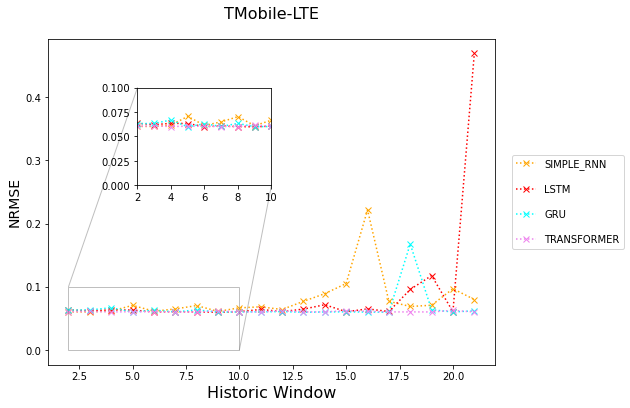

In [289]:

plot_rnn_vs_window(mode='single', trace='TMobile-LTE', normalize=True)

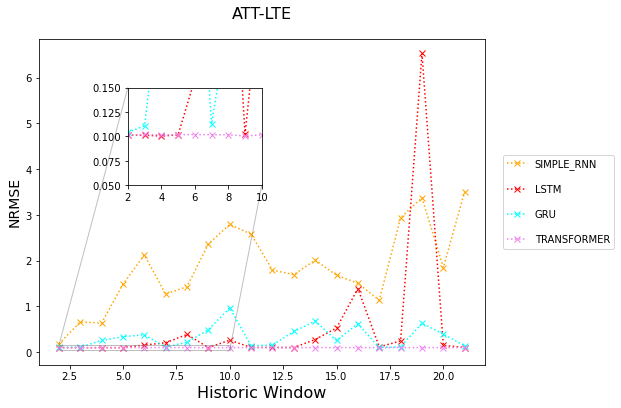

In [290]:
plot_rnn_vs_window(mode='single', trace='ATT-LTE', normalize=True)

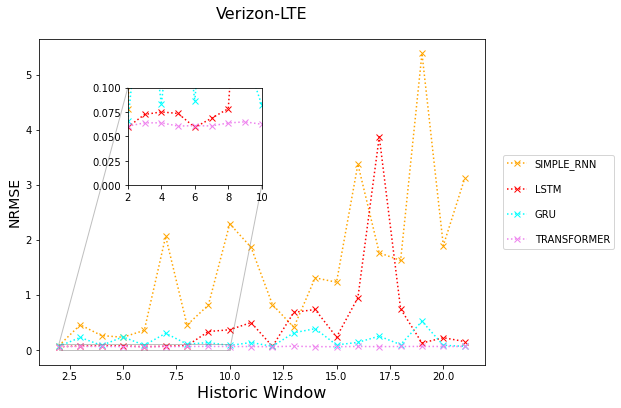

In [291]:
plot_rnn_vs_window(mode='single', trace='Verizon-LTE', normalize=True)

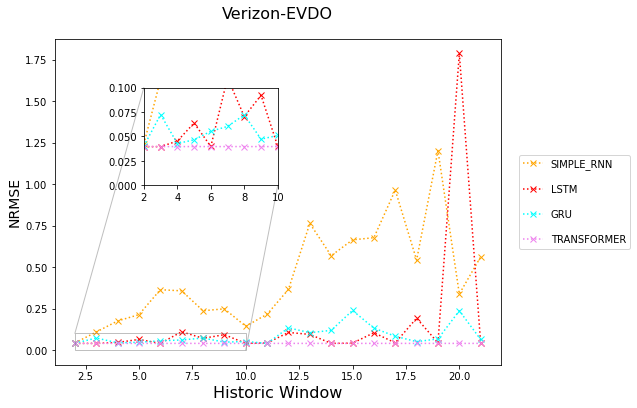

In [292]:
plot_rnn_vs_window(mode='single', trace='Verizon-EVDO', normalize=True)

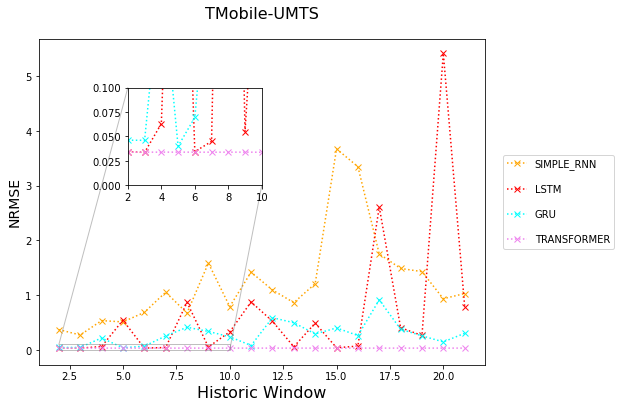

In [293]:
plot_rnn_vs_window(mode='single', trace='TMobile-UMTS', normalize=True)